# Multidimensionale Regression mit sklearn
## California Housing Daten
<img class="imgright" src="Images/cal_house.jpg" width=600 />
<br>copyright “Vecteezy.com”

Wir benutzen jetzt ein bekanntes Datenset aus dem U.S. Zensus von 1990. Wir arbeiten dabei mit dem vollen Programm von NumPy, pandas, Matplotlib als Hilfsmodulen und sklearn als ML Bibliothek. Die Daten stammen aus Californien, das US Zensus Büro hat 20640 Datensätze erhoben. Es wurden jeweils zusammenhängende Blöcke von Häusern erfasst mit zwischen 600 und 3000 Einwohnern. Für jeden Datensatz wurden 8 Features bestimmt:<br>
Diese sind:
<table
style="text-align: left; width: 100%; background-color: rgb(220, 220, 220);font-family:arial; font-size:16px;"
border="0" cellpadding="2" cellspacing="2" >
<tbody>
<tr>
<th style="vertical-align: top;text-align:center;">Feature</th>
<th style="vertical-align: top;text-align:center;">deutsch</th>
<th style="vertical-align: top;text-align:center;">english</th>
</tr>

<tr>
<td style="vertical-align: top;text-align:center;">MedInc</td>
<td style="vertical-align: top;text-align:center;">median income in block </td>
<td style="vertical-align: top;text-align:center;">mittleres Einkommen im Block</td>
</tr>

<tr>
<td style="vertical-align: top;text-align:center;">HouseAge</td>
<td style="vertical-align: top;text-align:center;">median house age in block </td>
<td style="vertical-align: top;text-align:center;">mittleres Alter der Häuser</td>

<tr>
<td style="vertical-align: top;text-align:center;">AveRooms</td>
<td style="vertical-align: top;text-align:center;">average number of rooms </td>
<td style="vertical-align: top;text-align:center;">mittlere Anzahl von Räumen</td>
</tr>

<tr>
<td style="vertical-align: top;text-align:center;">AveBedrms</td>
<td style="vertical-align: top;text-align:center;">average number of bedrooms</td>
<td style="vertical-align: top;text-align:center;">mittlere Anzahl der Schlafzimmer</td>
</tr>

<tr>
<td style="vertical-align: top;text-align:center;">Population</td>
<td style="vertical-align: top;text-align:center;">block population</td>
<td style="vertical-align: top;text-align:center;">Einwohnerzahl des Blocks</td>
</tr>

<tr>
<td style="vertical-align: top;text-align:center;">AveOccup</td>
<td style="vertical-align: top;text-align:center;">average house occupancy </td>
<td style="vertical-align: top;text-align:center;">mittlere Hausbelegung</td>
</tr>

<tr>
<td style="vertical-align: top;text-align:center;">Latitude</td>
<td style="vertical-align: top;text-align:center;">house block latitude</td>
<td style="vertical-align: top;text-align:center;">geograph. Breite des Blocks</td>
</tr>

<tr>
<td style="vertical-align: top;text-align:center;">Longitude</td>
<td style="vertical-align: top;text-align:center;">house block longitude </td>
<td style="vertical-align: top;text-align:center;">geograph. Länge des Blocks</td>
</tr>


</tbody>
</table>

Dieses Datenset kann man aus der StatLib Sammlung herunterladen.
http://lib.stat.cmu.edu/datasets/
<br><br>
Man kann dieses Set aber auch mit folgender sklearn Funktion downloaden:
<br>
```sklearn.datasets.fetch_california_housing``` 



In [1]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
type(dataset)

sklearn.utils._bunch.Bunch

Wie wir sehen, handelt es sich um einen "Bunch" Datentyp, den wir sehr bald in ein Pandas Dataframe Objekt umformen werden, um damit einfacher arbeiten zu können.

Hier die Feature Namen:

In [2]:
feature_names = dataset['feature_names']
print("Feature names: {}\n".format(feature_names))

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']



Wie üblich enthält ```dataset.data``` die Feature-Werte. Jede Zeile enthält die 8 Feature-Werte für einen Block. Wir zeigen die ersten 4 Samples des Feature-Raums und unten die ersten 4 Label mit ```dataset.target```.

In [24]:
print("number of samples in the file (number of rows): ", dataset.data.shape[0])
print("number of features per row (columns): ", dataset.data.shape[1])
dataset.data[:4]

number of samples in the file (number of rows):  20640
number of features per row (columns):  8


array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02]])

<b>Die Labels sind die geschätzten mittleren Werte eines Hauses in diesem Block in 100.000 $. Man kann sie mit dataset.target abrufen.

In [3]:
dataset.target[:4]

array([4.526, 3.585, 3.521, 3.413])

### Ein detaillierter Blick auf die Daten

Wie schon gezeigt, enthält jeder Eintrag (jede Reihe) die Daten eines Blocks. Dieser Block enthält eine nicht näher spezifizierte Anzahl von Häusern. Die zweite Spalte (```index == 1```) enthält das mittlere Alter der Häuser in diesem Block. Man kann die Daten filtern, wie unten gezeigt, hier die Häuser mit Alter unter 10 Jahren.


Median des Hausalters: 29.00
20640 mindestens 1 Jahre alt
20636 mindestens 2 Jahre alt
20578 mindestens 3 Jahre alt
20516 mindestens 4 Jahre alt
20325 mindestens 5 Jahre alt
20081 mindestens 6 Jahre alt
19921 mindestens 7 Jahre alt
19746 mindestens 8 Jahre alt
19540 mindestens 9 Jahre alt
19335 mindestens 10 Jahre alt
19071 mindestens 11 Jahre alt
18817 mindestens 12 Jahre alt
18579 mindestens 13 Jahre alt
18277 mindestens 14 Jahre alt
17865 mindestens 15 Jahre alt
17353 mindestens 16 Jahre alt
16582 mindestens 17 Jahre alt
15884 mindestens 18 Jahre alt
15314 mindestens 19 Jahre alt
14812 mindestens 20 Jahre alt
14347 mindestens 21 Jahre alt
13901 mindestens 22 Jahre alt
13502 mindestens 23 Jahre alt
13054 mindestens 24 Jahre alt
12576 mindestens 25 Jahre alt
12010 mindestens 26 Jahre alt
11391 mindestens 27 Jahre alt
10903 mindestens 28 Jahre alt
10432 mindestens 29 Jahre alt
9971 mindestens 30 Jahre alt
9495 mindestens 31 Jahre alt
9037 mindestens 32 Jahre alt
8472 mindestens 33 Jahr

Text(6, 3.3, 'Hier wohl abgebrochen')

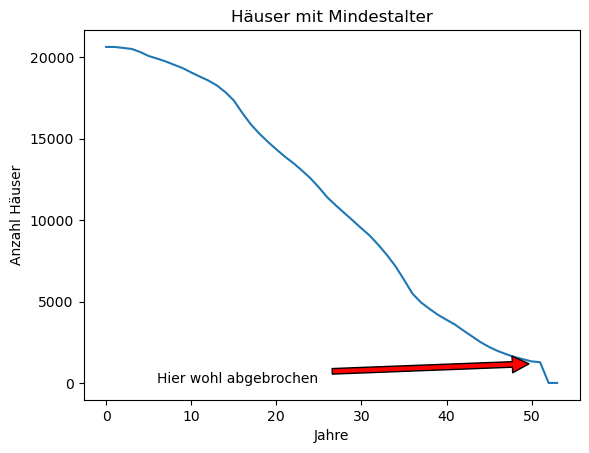

In [30]:
import numpy as np
import matplotlib.pyplot as plt
print(f"Median des Hausalters: {np.median(dataset.data[:,1]):5.2f}")
results = np.array(list())
for n in range(1,55):
    filtered_data= dataset.data[dataset.data[:,1]>=n] # alle Reihen, Spalte 1 unter n
    print(f"{len(filtered_data)} mindestens {n} Jahre alt")
    results = np.append(results,len(filtered_data))
plt.title("Häuser mit Mindestalter")
plt.ylabel("Anzahl Häuser")
plt.xlabel("Jahre")
plt.plot(results)

plt.annotate("Hier wohl abgebrochen", xy =(51,1200) , xytext = (6,3.3) , arrowprops = dict(facecolor ='red',
                                  shrink = 0.05))

### Visualisieren der Daten
Wir können uns die Daten besser vor Augen führen als Pandas DataFrame, hier die ersten 5 Samples.

In [31]:
import pandas as pd
data_df = pd.DataFrame(dataset.data)#bunch to dataframe

data_df.columns = ["MedInc", "HouseAge", "AveRooms", 
                   "AveBedrms", "Population", "AveOccup", 
                   "Latitude", "Longitude"]


data_df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Wir werden jetzt auch den mittleren Hauswert in unseren DataFrame einsetzen. Für die weitere Bearbeitung erwartet sklearn die Labels im shape(len(data),1), dies gilt praktisch immer. Dies erreichen wir, indem wir das 1 dimensionale Array dataset.targets reshapen.

In [28]:
data_df.insert(loc=len(data_df.columns),
               column="AvePropVal",
               value=dataset.target.reshape(-1,1)) #loc verschiebt die neue Spalte ganz nach rechts
# reshape macht aus dem array der targets mit einer Reihe und n Spalten ein array mit n Reihen und 1 Spalte
# - 1 steht für beliebige Anzahl Reihen , 1 für eine Spalte


In [32]:
targets=dataset.target.reshape(-1,1)
targets[:4]

array([[4.526],
       [3.585],
       [3.521],
       [3.413]])

Hier jetzt unser kompletter DataFrame mit den inkluierten Label (AvePropVal).

In [30]:
data_df[:5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvePropVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Unsere Daten enthalten aber noch fehlerhafte Werte. Es gibt sogar <b>Blöcke(!)</b>, wo die Häuser im Schnitt mehr als 100 Zimmer haben und auch entsprechend viele Schlafzimmer. 

In [31]:
data_df[data_df['AveRooms']>100]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvePropVal
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


Kann das sein? Eher nicht. Gehen wir mal davon aus, daß die Datensätze, wo die mittlere Zahl von Zimmern (z.B.) über 11  liegt, fehlerhaften Eingaben entsprechen. Schauen wir, wieviele Datensätze hier unter 12 liegen:

In [32]:
no_of_districts_before_cleansing = len(data_df)
data_df = data_df[data_df['AveRooms']<12]
print(f"Von insgesamt {no_of_districts_before_cleansing} haben {len(data_df )} unter 12 Schlafzimmer")
print("Gelöschte Blöcke: ", no_of_districts_before_cleansing - len(data_df))
data_df

Von insgesamt 20640 haben 20495 unter 12 Schlafzimmer
Gelöschte Blöcke:  145


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvePropVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Sehen wir uns mal an in einem Histogramm, was wir so übrig haben:


<AxesSubplot:>

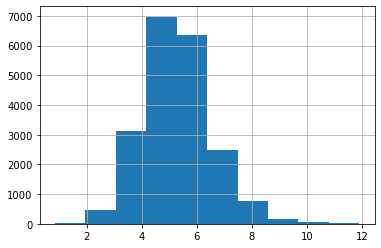

In [33]:
data_df['AveRooms'].hist()

Wir haben Grund zur Annahme, daß solche Fehler auch bei anderen Features wie der mittleren Anzahl von Bewohnern auftreten. Checken wir mal mit >13.

In [34]:
print(f" Wir haben {len(data_df[data_df['AveOccup']>13])} Blöcke mit mehr als 13 Bewohnern pro Haus")
data_df[data_df['AveOccup']>13]

 Wir haben 22 Blöcke mit mehr als 13 Bewohnern pro Haus


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvePropVal
1039,4.3029,16.0,6.090592,1.121951,4930.0,17.177700,38.42,-120.97,1.21900
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500
4479,3.5769,41.0,4.940000,1.100000,925.0,18.500000,34.07,-118.16,1.35700
5986,1.8750,52.0,4.500000,1.206349,2688.0,21.333333,34.10,-117.71,2.12500
7164,2.1845,36.0,4.812155,1.110497,2862.0,15.812155,34.06,-118.17,1.23800
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286,34.06,-118.45,5.00001
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59,1.54600
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33,1.62500
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.25000
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63,1.83300


Hier deren Verteilung mit den sehr unwahrscheinlichen Ausreißern und darunter der Rest mit weniger als 13 durchschnittlichen Bewohnern.

<AxesSubplot:>

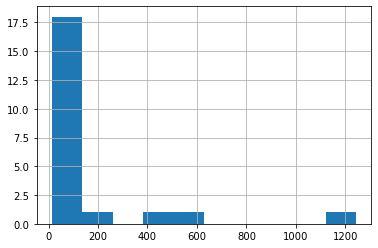

In [35]:
data_df["AveOccup"][data_df['AveOccup']>13].hist()


<AxesSubplot:>

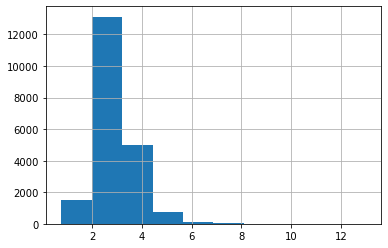

In [36]:
data_df['AveOccup'][data_df['AveOccup']<=13].hist() #die mittlere Anzahl von Bewohnern, wenn diese unter 13 ist.


Schauen wir uns einmal alle Features (ungefiltert) mit ihren Histogrammen an, damit wir die Fehler bei AveBedrms, AveOccup und AveRooms aber auch AvePropVal deutlich sehen können:

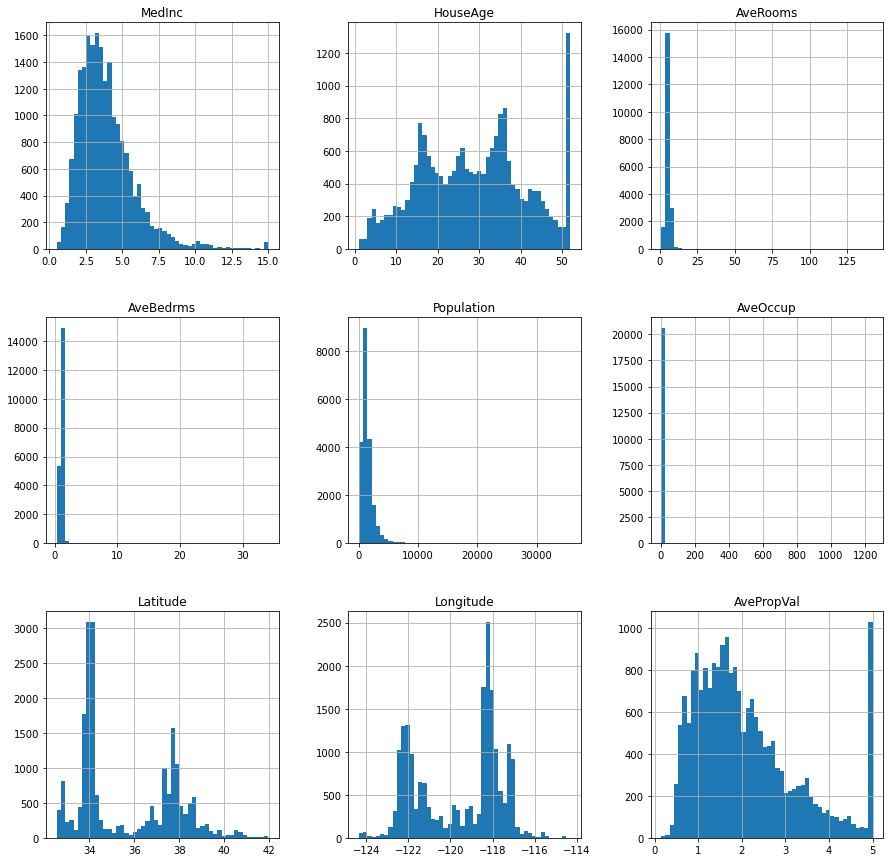

In [37]:
import matplotlib.pyplot as plt
data_df = pd.DataFrame(dataset.data)

data_df.columns = ["MedInc", "HouseAge", "AveRooms", 
                   "AveBedrms", "Population", "AveOccup", 
                   "Latitude", "Longitude"]
data_df.insert(loc=len(data_df.columns),
               column="AvePropVal",
               value=dataset.target.reshape(-1,1))
data_df.hist(bins=50, figsize=(15,15)) #mit diesem Befehl alle Histogramme
plt.show()

Hier haben wir die wahrscheinlichen Fehler herausgefiltert.

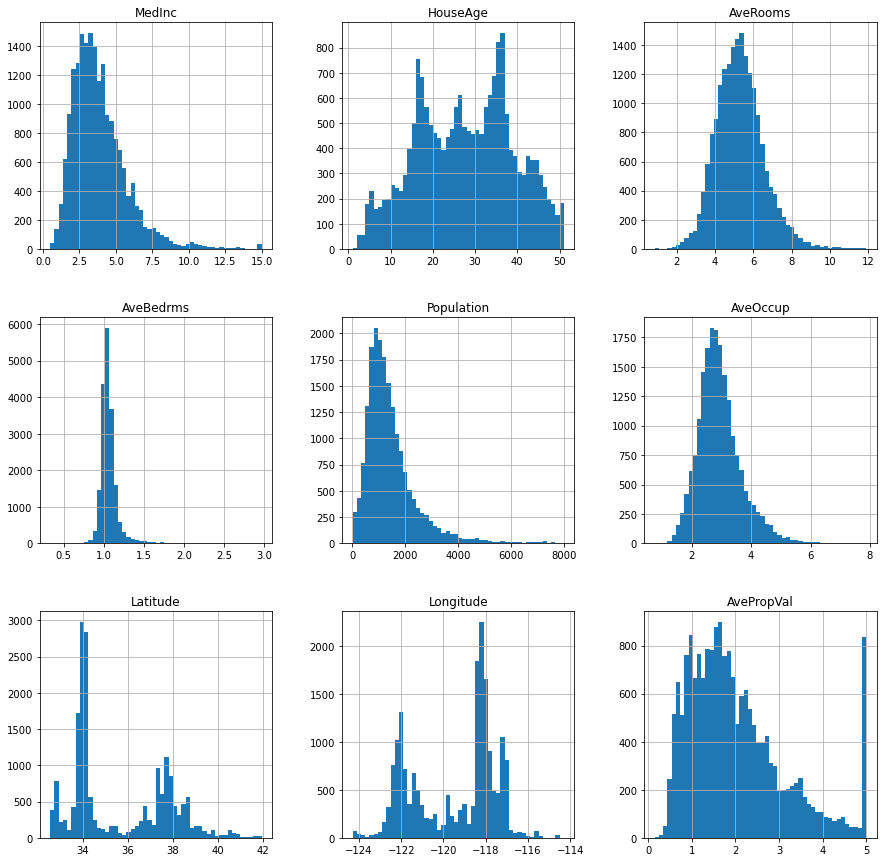

In [38]:
import matplotlib.pyplot as plt
data_df = pd.DataFrame(dataset.data)

data_df.columns = ["MedInc", "HouseAge", "AveRooms", 
                   "AveBedrms", "Population", "AveOccup", 
                   "Latitude", "Longitude"]
data_df.insert(loc=len(data_df.columns),
               column="AvePropVal",
               value=dataset.target.reshape(-1,1))
data_df=data_df[data_df["Population"]<8000] #schrittweises Filtern
data_df=data_df[data_df["AveBedrms"]<3]
data_df=data_df[data_df["AveOccup"]<8]
data_df=data_df[data_df["AveRooms"]<12]
data_df=data_df[data_df["HouseAge"]<52]
data_df.hist(bins=50, figsize=(15,15))
plt.show()

Eine Scatter Matrix der Features 'HouseAge', 'MedInc',
             'AveRooms', 'AveOccup' zeigt uns die Zusammenhänge auf.
             Dabei zeigt das einzelne Diagramm jeden Datenpunkt mit der entsprechenden Y- und x-Achse.
So sehen wir z.B. in der 3. Reihe , 2. Spalte einen deutlichen Trend zu mehr Räumen im Durchschnitt pro Haus bei höherem mittlerem Einkommen im Block.

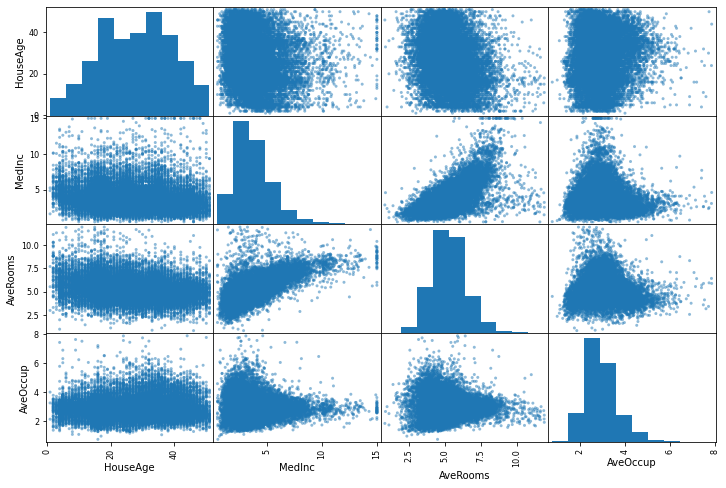

In [39]:
from pandas.plotting import scatter_matrix
attributes = ['HouseAge', 'MedInc',
             'AveRooms', 'AveOccup']
scatter_matrix(data_df[attributes], figsize=(12,8));

Nach unserem kompletten Filtervorgang verbleiben uns immer noch 19118 Samples.

In [40]:
data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvePropVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
15,2.1250,50.0,4.242424,1.071970,697.0,2.640152,37.85,-122.26,1.400
18,1.9911,50.0,5.343675,1.085919,990.0,2.362768,37.84,-122.26,1.587
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Hier ein Einzelplot von durchschnittlicher Anzahl von Bewohnern versus mittlerem Wert eines Hauses. Die teuersten Distrikte haben relativ wenig Bewohner pro Haus.

<AxesSubplot:xlabel='AveOccup', ylabel='AvePropVal'>

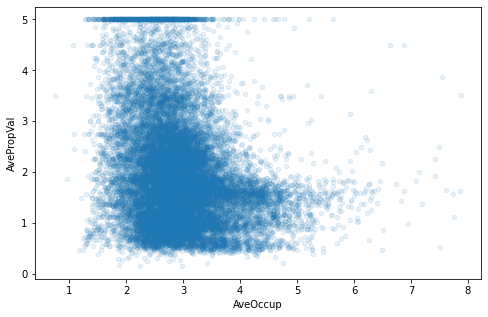

In [41]:
data_df.plot(kind='scatter', x='AveOccup', y='AvePropVal',
             alpha=0.1, figsize=(8,5))


Hier ein Scatterplot unserer Latitude / Longitude Datenfelder.

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

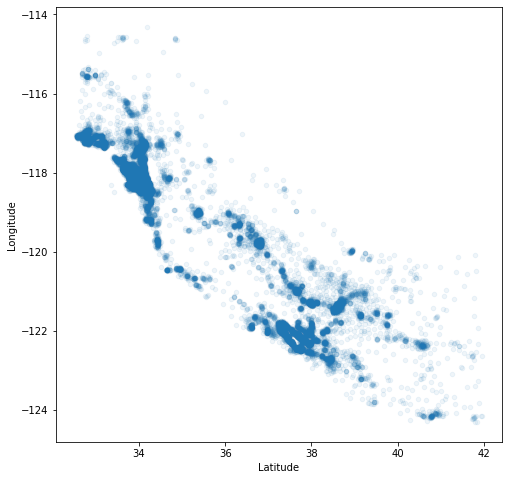

In [42]:
data_df.plot(kind='scatter', x='Latitude', y='Longitude',
             alpha=0.07, figsize=(8,8))


Dies entspricht der Karte von Californien mit den Schwerpunkten San Franzisko und Los Angeles.<br><br>
<img class="imgright" src="Images/Californien.jpg" width=600 />

Es muß uns klar sein, daß nach unserem Filtervorgang auch für <b>neue Daten, die wir später bearbeiten wollen, diese nur zulässig sind, wenn sie in allen Features in den von uns gesetzten Bereichen liegen.</b> Wir können sie sonst nicht vorhersagen!

### Aufsplitten der Daten in Trainingsdaten und Testdaten (jeweils Features und Label)

In [33]:

from sklearn.model_selection import train_test_split
data_sets = train_test_split(dataset.data, #alle Originaldaten
                             dataset.target,
                             test_size=0.30, #30% Testdatensätze 
                             random_state=40)

data_train, data_test, targets_train, targets_test = data_sets

### Der erste Klassifizierer mit einem neuronalen Netz
Wir werden jetzt den MLPRegressor Algorithmus verwenden, um unsere Daten zu klassifizieren und dann die Voraussagen unseres Modells für den geschätzten mittleren Wert eines Hauses in diesem Block mit den wahren Werten zu vergleichen. <br>
Der MLPRegressor benutzt ein neuronales Netz, hierauf wollen wir noch nicht eingehen, wir wollen uns jetzt darauf konzentrieren, wie die weitere Bearbeitung unserer Daten die Leistungsfähigkeit unseres Modells verbessert. In der Version mit völlig unbearbeiteten Daten sehen wir eine breite Streuung unserer Vorhersagewerte um die wahren Werte aber eine deutliche positive Korrelation. Die ausgedruckten Werte zeigen das Bestimmheitsmaß (coefficient of determination) für die Genauigkeit der Prediktion in den Trainings- (natürlich höher) und den Testdaten. Je höher der Wert (min. 0,max. 1) desto besser der Zusammenhang zwischen dem echten Wert und der Voraussage. Wir wollen danach sehen, was wir durch Datensäuberung und andere Maßnahmen erreichen können.

0.6439586177515986
0.6397259073155313


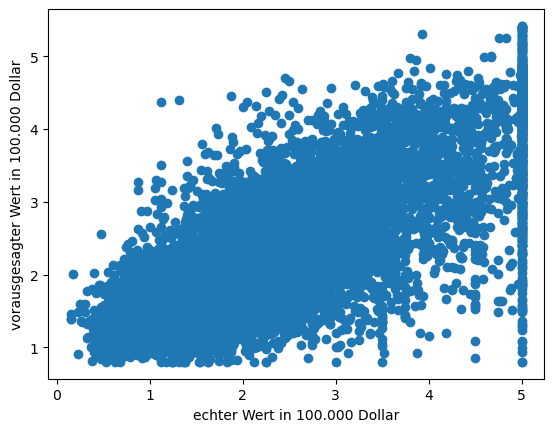

In [39]:
#lange Laufzeit
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs',        #  ‘lbfgs’, ‘sgd’, ‘adam’ (default)
                   alpha=1e-5,            # used for regularization, avoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(10,2), 
                   activation='logistic', # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’ (default)
                   max_iter=10000,
                   random_state=42)
clf.fit(data_train, targets_train)
predicted=clf.predict(data_train)
plt.scatter(targets_train,predicted)
plt.xlabel("echter Wert in 100.000 Dollar")
plt.ylabel("vorausgesagter Wert in 100.000 Dollar")
print(clf.score(data_train, targets_train))
print(clf.score(data_test, targets_test))

Hier die Beschreibung der Parameter des Modells für spätere Referenz, wenn wir uns mit neuronalen Netzen beschäftigt haben.<br><br>
Parameters:
    
- activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
  Activation function for the hidden layer.
  - ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
  - ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
  - ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
  - ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

- solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
  The solver for weight optimization.
  - ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
  - ‘sgd’ refers to stochastic gradient descent.
  - ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
  
  **Note:** The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.


Wichtig zu wissen ist, daß wir zwar unsere Daten von Ausreißern säubern können und dann neue Daten ebenfalls diesen Kriterien unterwerfen können, daß wir aber einen (wenn auch in diesem Beispiel zu vernachlässigenden) Fehler machen, wenn wir auf unseren <b>Gesamtdatensatz</b> Methoden wie Skalieren oder Normieren (Datapreprocessing) durchführen. Dies deshalb, weil wir hierbei aggregierte Werte (z.B. Mittelwert) erzeugen, die von allen in die Rechnung einbezogenen Datensätzen abhängig sind. Damit verwenden wir auch die Testdaten für diese Bestimmung und dadurch werden unsere Vorhersagen für die Testdaten fälschlich etwas zu gut. Diesen Prozess nennt man "Data Leaking". Bekanntermaßen darf ja keine Information von den Testdaten zu den Trainingsdaten fließen. Bei neuen Daten müßten wir für diesen Fehler durch geringere Accuracy bezahlen. Richig wäre es also, das Datenpreprocessing <b>nur auf unsere Trainingsdaten</b> anzuwenden, die dadurch gewonnenen Werte dann zu übernehmen und mit diesen dann auch unsere Testdaten und eventuelle neue Datensätze zu bearbeiten. Die Datapreprocessing Information käme so nur aus unseren Trainingsdaten.

### Data Preprocessing

#### Datensäuberung Entfernung von Ausreißern

In [40]:
max_age=52
max_ave_rooms = 12
max_bed=3
max_pop=8000
max_occ=8


x = dataset.data[:,1] <= max_age  # Boolean array
data = dataset.data[x]
targets = dataset.target[x]
x = data[:,2] <= max_ave_rooms  # Boolean array
data = data[x]
targets = targets[x]
x = data[:,3] <= max_bed  # Boolean array
data = data[x]
targets = targets[x]
x = data[:,4] <= max_pop  # Boolean array
data = data[x]
targets = targets[x]
x = data[:,5] <= max_occ # Boolean array
data = data[x]
targets = targets[x]

data.shape , targets.shape

((20381, 8), (20381,))

Wir können hier den kompletten Datensatz säubern, also sowohl Trainings- als auch Testdatensätze, die ja noch nicht aufgesplittet sind.
Schauen wir uns hier mal die wesentliche Statistik unserer gesäuberten Daten an, wir haben Mittelwert, Standardabweichung, Minimum, Maximum, Percentilen (25%,50%,75%):

In [46]:
data_df = pd.DataFrame(data)

data_df.columns = ["MedInc", "HouseAge", "AveRooms", 
                   "AveBedrms", "Population", "AveOccup", 
                   "Latitude", "Longitude"]
data_df.insert(loc=len(data_df.columns),
               column="AvePropVal",
               value=targets)#.reshape(-1,1))

data_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvePropVal
count,20381.000000,20381.000000,20381.000000,20381.000000,20381.000000,20381.000000,20381.000000,20381.000000,20381.000000
mean,3.868229,28.771552,5.294728,1.069461,1402.444483,2.915941,35.622759,-119.574978,2.071786
std,1.894251,12.540557,1.270529,0.140869,977.037071,0.745697,2.131427,2.003621,1.155206
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.562500,18.000000,4.434783,1.005602,793.000000,2.431062,33.930000,-121.810000,1.196000
50%,3.532300,29.000000,5.217799,1.048035,1168.000000,2.819620,34.250000,-118.490000,1.804000
75%,4.742600,37.000000,6.023669,1.097826,1721.000000,3.280255,37.710000,-118.010000,2.653000
max,15.000100,52.000000,11.901869,2.971631,7985.000000,7.873418,41.950000,-114.310000,5.000010


In [47]:
import numpy as np
avebedrms_index = 3
#so holen wir unser min und max
np.min(data[:,3]), np.max(data[:,3])

(0.3333333333333333, 2.971631205673759)

Damit sind unsere Daten mit geringem Verlust gesäubert.

#### Nächster Versuch der Klassifizierung



In [42]:
from sklearn.model_selection import train_test_split
data_sets = train_test_split(data,#alle gesäuberten Daten
                             targets,
                             test_size=0.30,
                             random_state=100)

data_train, data_test, targets_train, targets_test = data_sets

In [49]:
print(f" Daten nach dem Säubern: {data.shape} vorher: {dataset.data.shape} ")

 Daten nach dem Säubern: (20381, 8) vorher: (20640, 8) 


In [45]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs',        #  ‘lbfgs’, ‘sgd’, ‘adam’ (default)
                   alpha=1e-5,            # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(10, 2), 
                   activation='logistic', # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’ (default)
                   max_iter=10000,
                   random_state=100)
clf.fit(data_train, targets_train)
print(clf.score(data_train, targets_train))
print(clf.score(data_test, targets_test))

0.6481863247028021
0.6482640832436157


Das ist schon geringfügig besser (für die Testdaten). Da die Features sich sehr in ihrer absoluten Größe unterscheiden, sollten wir sie skalieren. Mit preprocessing.scale können wir jedes Feature auf einen Mittelwert von 0 und eine Standardabweichung von 1 skalieren. Aber bitte obige Bemerkung hierzu beachten. Unten der Vergleich.

In [51]:
from sklearn import preprocessing

data_scaled = preprocessing.scale(data)
data_scaled.shape
# Achtung so passiert Dataleaking deshalb so nicht
print(data_df.columns)
print(data[:2])
print(data_scaled[:2])

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'AvePropVal'],
      dtype='object')
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]]
[[ 2.35295108  0.97513595  1.32971425 -0.32408173 -1.10586489 -0.48329841
   1.05905404 -1.3251442 ]
 [ 2.34038644 -0.61972866  0.7425507  -0.69272428  1.02204926 -1.08102704
   1.04967042 -1.32015311]]


In [61]:
#Laufzeit!
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
data_sets = train_test_split(data[:5000],#alle gesäuberten Daten
                             targets[:5000],
                             test_size=0.30,
                             random_state=700)

pipe = make_pipeline(StandardScaler(), MLPRegressor(solver='lbfgs',        #  ‘lbfgs’, ‘sgd’, ‘adam’ (default)
                   alpha=1e-5,            # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(10, 2), 
                   activation='logistic', # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’ (default)
                   max_iter=11000,
                   random_state=100))
pipe.fit(data_train, targets_train)  # apply scaling on training data


print(f"Train {pipe.score(data_train, targets_train)}")  # apply scaling on testing data, without leaking training data.
print(f"Test {pipe.score(data_test, targets_test)}")

#fehlerhaft gemacht, da keine Pipeline und Gesamtdaten skaliert
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
data_sets = train_test_split(preprocessing.scale(data[:5000]),#alle gesäuberten Daten
                             targets[:5000],
                             test_size=0.30,
                             random_state=700)

data_train, data_test, targets_train, targets_test = data_sets

clf = MLPRegressor(solver='lbfgs',        #  ‘lbfgs’, ‘sgd’, ‘adam’ (default)
                   alpha=1e-5,            # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(10, 2), 
                   activation='logistic', # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’ (default)
                   max_iter=11000,
                   random_state=100)
clf.fit(data_train, targets_train)
print(f"Train mit Skalierung Gesamtdaten! {clf.score(data_train, targets_train)}")
print(f"Test mit Skalierung Gesamtdaten! {clf.score(data_test, targets_test)}")

Train 0.8563168503076344
Test 0.8030090971317964
Train mit Skalierung Gesamtdaten! 0.8566699442459722
Test mit Skalierung Gesamtdaten! 0.802706930129999


Das ist deutlich besser, obwohl wir nur 5000 Datensätze verwenden. Wir benutzen hier eine Pipeline, um die Standardskalierung auf die Trainingsdaten anzuwenden und dann den MLPRegressor. Wenn wir dann Labels voraussagen für die Testdaten, wird auch hier für die Features der Standardskaler mit denselben Parametern wie für die Testdaten (die aber nur mit den Testdaten bestimmt wurden!) angewendet, es entsteht kein Data Leaking, das heißt die Testdaten haben keinerlei Einfluß auf die Trainingsdaten. Im zweiten Beispiel machen wir dies nicht, wir Skalieren die Gesamtdaten in einem Durchgang und produzieren ein Dataleak. Wirkt es sich hier aus? Wir sehen, dass beim falschen Vorgehen die Testdaten auch nicht besser bewertet werden. Das heisst aber nicht, dass dieser Fehler in anderen Situtionen nicht fatal sein kann.

[1.81866033 0.94914473 1.82492161 ... 2.60055424 1.45090105 0.6939355 ]


Text(0, 0.5, 'vorausgesagter Wert in 100.000 Dollar')

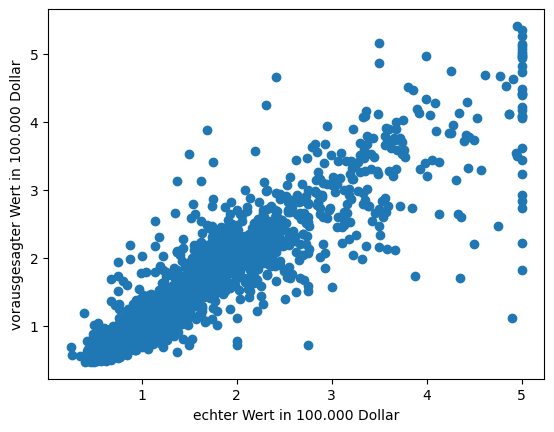

In [59]:
import matplotlib.pyplot as plt
predicted=pipe.predict(data_test)

print(predicted)
plt.scatter(targets_test,predicted)
plt.xlabel("echter Wert in 100.000 Dollar")
plt.ylabel("vorausgesagter Wert in 100.000 Dollar")


Wir sehen, Skalierung ist wichtig! Im Vergleich zum Anfangsdiagramm können wir die wesentlich bessere Accuracy sehen. Was passiert, wenn wir das Netz vergrössern? Schon etwas.``` Bei (10,10,2) haben wir: 0.8063 und 0.8229.```
Wenn wir das Netz weiter ausbauen, passt es sich zwar den Trainingsdaten besser an, der Zugewinn für die Testdaten ist aber marginal.
Es beginnt zu "overfitten", also die Trainingsdaten mit allen Besonderheiten wie "auswendig zu lernen". Das hilft aber dann bei den unbekannten Testdaten wenig.<b> Wir erhalten so Werte wie z.B.: 0.843 /0.823  für Training/Test o.ä.</b>

In [60]:
#hoher Zeitbedarf
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor


pipe = make_pipeline(StandardScaler(), MLPRegressor(solver='lbfgs',        #  ‘lbfgs’, ‘sgd’, ‘adam’ (default)
                   alpha=1e-5,            # used for regularization, avoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(10,10,2), 
                   activation='logistic', # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’ (default)
                   max_iter=10000,
                   random_state=42))
pipe.fit(data_train, targets_train)  # apply scaling on training data

print(f"Train {pipe.score(data_train, targets_train)}")  # apply scaling on testing data, without leaking training data.

print(f"Test {pipe.score(data_test, targets_test)}")




Train 0.8947677751770722
Test 0.7909899719702034


In diesem Kapitel ging es darum, Datenprocessierung zu zeigen und den Umgang mit pandas und numpy, sowie Matplotlib in diesem Zusammenhang. Genaueres über neurale Netzwerke lernen wir später.

Hier noch ein Test, ob die Lage der Blöcke in Californien eine Rolle spielt für den Preis. Ja, sie ist wichtig und auch die merkwürdige Verteilung von Latitude und Longitude stört das Netz nicht.

0.7063267304518734
0.7130392699518233


Text(0, 0.5, 'vorausgesagter Wert in 100.000 Dollar')

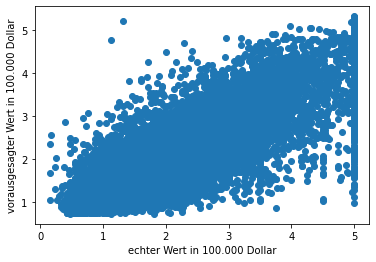

In [55]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.model_selection import train_test_split
data_scaled_ohne=np.delete(data_scaled,[6,7],1) #löschen von Latitude/Longitude

data_sets = train_test_split(data_scaled_ohne,
                             targets,
                             test_size=0.30,
                             random_state=42)

data_train, data_test, targets_train, targets_test = data_sets
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs',        #  ‘lbfgs’, ‘sgd’, ‘adam’ (default)
                   alpha=1e-5,            # used for regularization, avoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(10, 2), 
                   activation='logistic', # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’ (default)
                   max_iter=10000,
                   random_state=42)
clf.fit(data_train, targets_train)
print(clf.score(data_train, targets_train))
print(clf.score(data_test, targets_test))
predicted=clf.predict(data_train)
plt.scatter(targets_train,predicted)
plt.xlabel("echter Wert in 100.000 Dollar")
plt.ylabel("vorausgesagter Wert in 100.000 Dollar")

Was ist nun, wenn wir einzelne Trainingsdatensätze eingeben wollen.
Bevor wir diese mit unserem trainierten Modell vorhersagen können, müssen wir schauen, ob der Datensatz in unsere Filterbedingungen passt. Falls das nicht der Fall ist, können wir ihn nicht verwenden, da das Modell solche Datensätze nicht gelernt hat. Hier nehmen wir einen Datensatz und lassen ihn vorhersagen. (Wir haben einen Satz aus unseren Trainingsdaten genommen, um mit dessen Label vergleichen zu können. Dies ist natürlich nur zu didaktischen Zwecken, die Daten sollten ja unbekannt sein!)

In [56]:
import numpy as np
max_age=52
max_ave_rooms = 12
max_bed=3
max_pop=8000
max_occ=8

data_single=np.array([ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,  1.02380952e+00,
   3.22000000e+02,  2.55555556e+00,  3.78800000e+01, -1.22230000e+02])
#possible to include?
if data_single[1]<=max_age and \
data_single[2]<=max_ave_rooms and \
data_single[3]<=max_bed and \
data_single[4]<=max_pop and \
data_single[5]<=max_occ:
    print("Datensatz kann bearbeitet werden")
else:
    print("Datensatz hat fehlerhafte Werte")
    


Datensatz kann bearbeitet werden


In [57]:
data_single=data_single.reshape(1,-1)
print(f"Vorausgesagt: {pipe.predict(data_single)[0]} echt: 4.526")


Vorausgesagt: 4.032553102146111 echt: 4.526
